# Melbourne Suburb Analysis based on School


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path
import scipy.stats as stats


# Load data from CSV files

## File Used --- 
##  Melbourne_Suburb_data.csv
##  top100_high_school_melbourne.csv

# Set the path of the files which will be used for analsysis
# Set the path of Melbourne Suburb Data
melb_sub_data_to_load = Path("Resources/Melbourne_Suburb_data.csv")

## Set the path of the Top100_high_school_melbourne.csv
school_suburb_data_to_load = Path("Resources/top100_high_school_melbourne.csv")

# Read School and Suburb Data File and store into Pandas DataFrames
df_Melb_reduced = pd.read_csv(melb_sub_data_to_load)
school_suburb_data = pd.read_csv(school_suburb_data_to_load)


## School Rank vs House Price Code

In [ ]:
## Others have used the data frame - df_Melb_reduced
melb_sub_data = df_Melb_reduced.copy()

## Change the column name to Suburb
melb_sub_data.rename(columns={'PA': 'PerAnnumGrowth'}, inplace=True)
melb_sub_data.rename(columns={'Locality': 'Suburb'}, inplace=True)

# Merge data of melbourne suburb and school rank on suburb name
merged_suburb_school_data = pd.merge(school_suburb_data, melb_sub_data, on='Suburb', how="left")


# Save the merged data to a csv file
merged_suburb_school_data.to_csv("Resources/merged_suburb_school_data.csv", index_label="Index_Number")

# print Suburb_School_Name_Rank_PerAnnumGrowth
merged_suburb_school_data[["Suburb","School_Name", "Rank", "PerAnnumGrowth"]]

# save Suburb_School_Name_Rank_PerAnnumGrowth in a different csv file
merged_suburb_school_data[["Suburb","School_Name", "Rank", "PerAnnumGrowth"]].to_csv("Resources/output/school_suburb_ranking.csv", index_label="Number")

## Function to calculate Correlation Coefficient and plot graph
def create_regression_plots(x_values, y_values, x_point, y_point):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # plt.annotate(line_eq,(x_point,y_point),fontsize=15,color="red")
    plt.xlabel('School Rank')
    plt.ylabel (y_values.name)
    plt.title("School Rank vs "+ "Suburb " + y_values.name)
    #print(f"The r^2 value is: {rvalue**2}")
    plt.gca().invert_xaxis()
    plt.grid()
    plt.show()


## Equity Growth Hypothesis

### Null Hypothesis
##### There is no correlation between per annum growth of house prices and the school rank of the suburb.
### Alternative Hypothesis
##### There is a correlation between per annum growth of house prices and the school rank of the suburb.

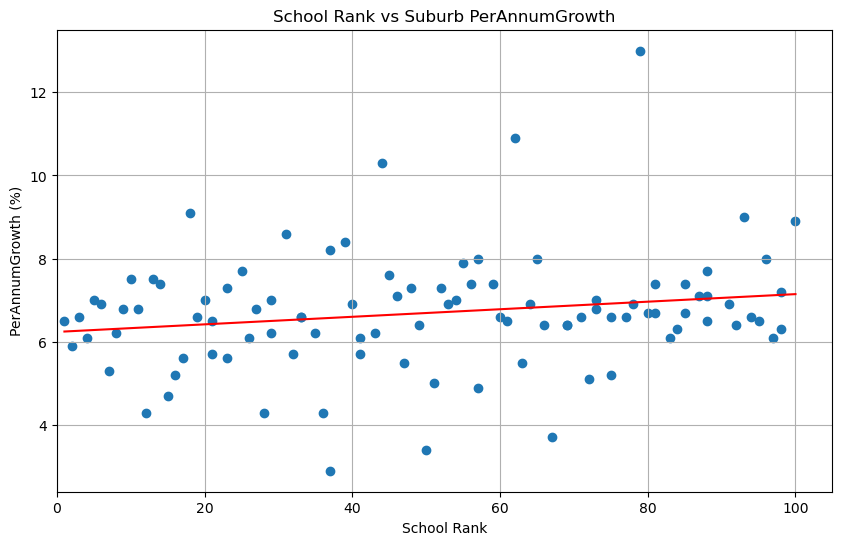

Pearson correlation coefficient: 0.1874315234737049
P-value: 0.0632066020143343


In [9]:
## Plot graph between per Annum growth and school rank in that suburb

## Get X axis and Y axis values 
## X Axis - Rank  Y Axis - per annum growth
x_values = merged_suburb_school_data["Rank"]
y_values = merged_suburb_school_data["PerAnnumGrowth"]

## call create_regression_plots function to create the regression plot
# create_regression_plots(x_values, y_values, 3, 3)

# Plot School Rankings vs per Annum Growth
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(x_point,y_point),fontsize=15,color="red")
plt.xlabel('School Rank')
plt.ylabel ('PerAnnumGrowth (%)')
plt.title("School Rank vs "+ "Suburb " + "PerAnnumGrowth")
plt.xlim(left=0)
plt.savefig("Resources/output/SchoolRankvsPAGrowth.png")
plt.grid()
plt.show()

# Calculate the Pearson correlation coefficient PerAnnumGrowth vs School Rank
correlation, p_value = stats.pearsonr(merged_suburb_school_data['PerAnnumGrowth'], merged_suburb_school_data['Rank'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Per Annum Growth and School Rank Analysis

* Pearson correlation coefficient: 0.1874315234737049

The correlation coefficient indicates a weak positive relationship between school rank and annual growth, suggesting a slight tendency for improved school rankings to correlate with increased annual growth. However, the correlation is too weak to be considered statistically significant.

* P-value: 0.0632066020143343

The p-value falls just short of the conventional significance threshold of 0.05, indicating that the observed correlation may be due to chance rather than a genuine relationship. As a result, we fail to reject the null hypothesis, which states that there is no correlation between school rank and annual growth.

## Hypotheses:

Null Hypothesis (H₀): No correlation exists between annual growth and school rank.  
Alternate Hypothesis (H₁): A correlation exists between annual growth and school rank.

## Conclusion:
The weak positive correlation observed between school rank and annual growth is not statistically significant at the 0.05 level. This suggests that the relationship may be due to chance rather than a genuine underlying correlation. To draw stronger conclusions, additional data or a different significance level may be necessary.

## School Rank vs Suburb Equity Growth

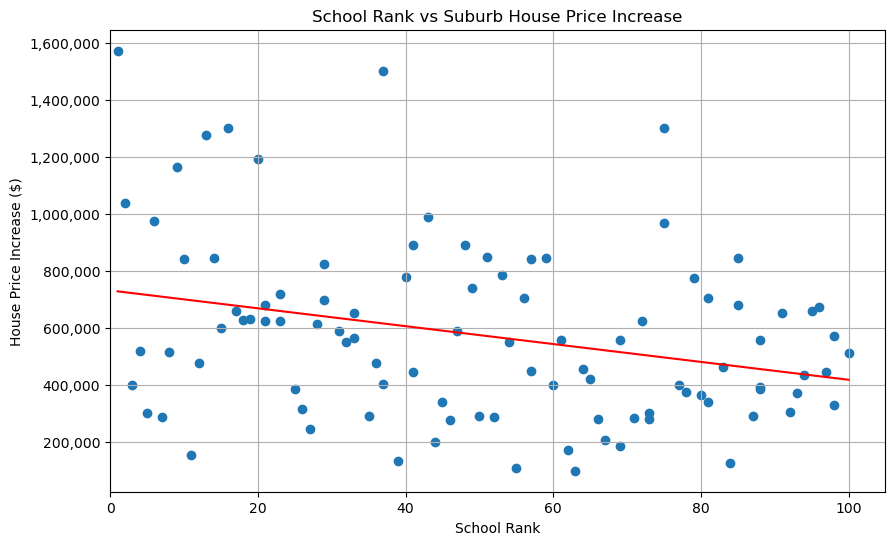

Pearson correlation coefficient: -0.2959716322627806
P-value: 0.0029353964662798796


In [11]:
import matplotlib.ticker as ticker
merged_suburb_school_data['Equity_Growth'] = merged_suburb_school_data['2023'] - merged_suburb_school_data['2013']
merged_suburb_school_data[["Suburb","School_Name", "Rank", "Equity_Growth", "PerAnnumGrowth"]].head()

## Get X axis and Y axis values
## X Axis - Rank  Y Axis - Equity_Growth [house price increase from 2013 to 2023]
x_values = merged_suburb_school_data["Rank"]
y_values = merged_suburb_school_data["Equity_Growth"]


## call create_regression_plots function to create the regression plot
# create_regression_plots(x_values, y_values, 3, 3)

# Plot School Rankings vs House Prices
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('School Rank')
plt.ylabel ('House Price Increase ($)')
plt.title("School Rank vs "+ "Suburb " + "House Price Increase")
plt.xlim(left=0)
# Set y-axis to display actual values ref link - https://stackoverflow.com/questions/53747298/how-to-format-axis-tick-labels-from-number-to-thousands-or-millions-125-436-to
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.savefig("Resources/output/SchoolRankvsSuburbHousePrice.png")
plt.grid()
plt.show()

# Calculate the Pearson correlation coefficient Equity Growth vs School Rank
correlation, p_value = stats.pearsonr(merged_suburb_school_data['Equity_Growth'], merged_suburb_school_data['Rank'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


# Equity Growth and School Rank Analysis

* Pearson correlation coefficient: -0.2959716322627806

The correlation coefficient indicates a weak to moderate negative correlation between school rank and equity growth, suggesting that better-ranked schools are associated with higher equity growth.

* P-value: 0.0029353964662798796

The p-value is significantly below the 0.05 threshold, providing strong evidence to reject the null hypothesis and confirm a statistically significant correlation between school rank and equity growth.

## Hypotheses:

Null Hypothesis (H₀): No correlation exists between equity growth and school rank.
Alternate Hypothesis (H₁): A correlation exists between equity growth and school rank.

## Conclusion:
The results show a significant negative correlation between school rank and equity growth, indicating that better-ranked schools are associated with higher equity growth. This correlation is statistically significant at the 0.05 level, providing meaningful insight into the relationship between school rankings and equity growth in the housing market.

In summary, the data suggests that suburbs with better-ranked schools tend to experience higher equity growth, supporting the idea that school rankings have a positive impact on the housing market.

## Median per annum growth and Equity Growth

In [12]:
## Median per annum Growth for all Melbourne Suburbs
median_per_annum_growth = melb_sub_data['PerAnnumGrowth'].median()

print(f"The median per annum growth value is: {median_per_annum_growth}")

The median per annum growth value is: 6.8


In [13]:
## Median Equity Growth for all Melbourne Suburbs

## Calculate the Equity Growth  - difference between 2023 house price and 2013 house price 
## and save it as a new Column [Equity_Growth] in dataframe
melb_sub_data['Equity_Growth'] = melb_sub_data['2023'] - melb_sub_data['2013']

## Calculate the Median Equity Growth for Melbourne Suburbs
median_equity_growth = melb_sub_data['Equity_Growth'].median()

print(f"The median equity growth value is: {median_equity_growth}")

The median equity growth value is: 375000.0


## Top performing Suburb based on Ranking of schools

In [14]:
# Sort and show top five suburb based on equity growth
top_suburb = merged_suburb_school_data.sort_values("Equity_Growth", ascending=False)
top_suburb[["Suburb","School_Name", "Rank", "Equity_Growth", "PerAnnumGrowth"]].head(10)



,Suburb,School_Name,Rank,Equity_Growth,PerAnnumGrowth
0,EAST MELBOURNE,Mac.Robertson Girls' High School,1,1573000,6.5
36,HAWTHORN EAST,Auburn High School,37,1502500,8.2
74,CANTERBURY,Camberwell High School,75,1302500,5.2
15,CANTERBURY,Canterbury Girls Secondary College,16,1302500,5.2
12,PARKVILLE,University High School,13,1277000,7.5
19,BRIGHTON EAST,Brighton Secondary College,20,1195000,7.0
8,BALWYN NORTH,Balwyn High School,9,1165000,6.8
1,SOUTH YARRA,Melbourne High School,2,1037500,5.9
42,KEW EAST,Kew High School,43,990000,6.2
5,MCKINNON,McKinnon Secondary College,6,975000,6.9


## Analysis
The median equity growth for the suburbs is $375,000, but top 10 ranked public schools suburbs show significantly higher average equity growth, outperforming the median by a substantial margin.

Data reveals a strong performance by high-ranking schools in equity growth, outpacing the median by a substantial amount.

## Bottom performing Suburb based on Equity Growth

In [15]:
# Sort and show top five suburb based on equity growth
top_suburb = merged_suburb_school_data.sort_values("Equity_Growth", ascending=True)
top_suburb[["Suburb","School_Name", "Rank", "Equity_Growth", "PerAnnumGrowth"]].head(10)


,Suburb,School_Name,Rank,Equity_Growth,PerAnnumGrowth
62,DONALD,Donald High School,63,100000,5.5
54,WYCHEPROOF,Wycheproof P-12 College,55,108500,7.9
82,KERANG,Kerang Technical High School,84,128000,6.3
38,WARRACKNABEAL,Warracknabeal Secondary College,39,132500,8.4
10,CORRYONG,Corryong College,11,153500,6.8
61,MURTOA,Murtoa College,62,172500,10.9
67,HORSHAM,Horsham College,69,185000,6.4
43,CHARLTON,Charlton College,44,200000,10.3
66,ARMSTRONG CREEK,Oberon High School,67,207500,3.7
26,BALLARAT EAST,Woodmans Hill Secondary College,27,247500,6.8


## Analysis

The median equity growth for the suburbs is $375,000, but Bottom 10 ranked public schools suburbs show significantly lower average equity growth compare to the top 10 ranked school suburbs. 
